In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("Train_Dataset.csv")

<ipython-input-114-57baf9d86d64>:1: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("Train_Dataset.csv")


In [ ]:
df.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [ ]:
df.shape

(121856, 40)

In [ ]:
(df.isnull().sum()/len(df)).sort_values(ascending=False)

Own_House_Age                 0.657292
Score_Source_1                0.564888
Social_Circle_Default         0.508206
Client_Occupation             0.340032
Score_Source_3                0.220925
Credit_Bureau                 0.152147
ID_Days                       0.048976
Score_Source_2                0.046662
Population_Region_Relative    0.039859
Loan_Annuity                  0.039489
Client_Income_Type            0.030372
Client_Housing_Type           0.030257
Phone_Change                  0.030068
Application_Process_Hour      0.030060
House_Own                     0.030044
Loan_Contract_Type            0.029962
Employed_Days                 0.029945
Client_Education              0.029912
Child_Count                   0.029855
Active_Loan                   0.029830
Credit_Amount                 0.029806
Bike_Owned                    0.029740
Registration_Days             0.029658
Type_Organization             0.029617
Client_Income                 0.029601
Age_Days                 

In [ ]:
df.drop(['Own_House_Age','Score_Source_1'],axis=1,inplace=True)

In [ ]:
num_col=[feature for feature in df.columns if df[feature].dtype != 'object']
cat_col=[feature for feature in df.columns if df[feature].dtype == 'object']

In [ ]:
num_col

['ID',
 'Car_Owned',
 'Bike_Owned',
 'Active_Loan',
 'House_Own',
 'Child_Count',
 'Mobile_Tag',
 'Homephone_Tag',
 'Workphone_Working',
 'Client_Family_Members',
 'Cleint_City_Rating',
 'Application_Process_Day',
 'Application_Process_Hour',
 'Score_Source_2',
 'Social_Circle_Default',
 'Phone_Change',
 'Credit_Bureau',
 'Default']

In [ ]:
cat_col

['Client_Income',
 'Credit_Amount',
 'Loan_Annuity',
 'Accompany_Client',
 'Client_Income_Type',
 'Client_Education',
 'Client_Marital_Status',
 'Client_Gender',
 'Loan_Contract_Type',
 'Client_Housing_Type',
 'Population_Region_Relative',
 'Age_Days',
 'Employed_Days',
 'Registration_Days',
 'ID_Days',
 'Client_Occupation',
 'Client_Permanent_Match_Tag',
 'Client_Contact_Work_Tag',
 'Type_Organization',
 'Score_Source_3']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [ ]:
df['Client_Income']=df['Client_Income'].replace(to_replace='$',regex=True, value= None)
df['Client_Income']=df['Client_Income'].astype(float)

In [ ]:
df['Credit_Amount']=df['Credit_Amount'].replace(to_replace='$',regex=True, value= None)
df['Credit_Amount']=df['Credit_Amount'].astype(float)

In [ ]:
df['Loan_Annuity']=df['Loan_Annuity'].replace(to_replace='$',regex=True, value= None)
df['Loan_Annuity']=df['Loan_Annuity'].astype(float)

In [ ]:
df['Population_Region_Relative']=df['Population_Region_Relative'].replace(to_replace='@', value= None)
df['Population_Region_Relative']=df['Population_Region_Relative'].replace(to_replace='#', value= None)
df['Population_Region_Relative']=df['Population_Region_Relative'].astype(float)

In [ ]:
df['Age_Days']=df['Age_Days'].replace(to_replace='x', value= None)
df['Age_Days']=df['Age_Days'].astype(float)

In [ ]:
df['Employed_Days']=df['Employed_Days'].replace(to_replace='x', value= None)
df['Employed_Days']=df['Employed_Days'].astype(float)

In [ ]:
df['Registration_Days']=df['Registration_Days'].replace(to_replace='x', value= None)
df['Registration_Days']=df['Registration_Days'].astype(float)

In [ ]:
df['ID_Days']=df['ID_Days'].replace(to_replace='x', value= None)
df['ID_Days']=df['ID_Days'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               15898 non-null   float64
 2   Car_Owned                   121856 non-null  float64
 3   Bike_Owned                  121856 non-null  float64
 4   Active_Loan                 121856 non-null  float64
 5   House_Own                   121856 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               79501 non-null   float64
 8   Loan_Annuity                121856 non-null  float64
 9   Accompany_Client            121856 non-null  object 
 10  Client_Income_Type          121856 non-null  object 
 11  Client_Education            121856 non-null  object 
 12  Client_Marital_Status       121856 non-null  object 
 13  Client_Gender 

In [ ]:
df['Credit_Bureau']=df['Credit_Bureau'].fillna(df['Credit_Bureau'].mode()[0])
df['Client_Income_Type']=df['Client_Income_Type'].fillna(df['Client_Income_Type'].mode()[0])
df['Bike_Owned']=df['Bike_Owned'].fillna(df['Bike_Owned'].mode()[0])
df['Type_Organization']=df['Type_Organization'].fillna(df['Type_Organization'].mode()[0])
df['Active_Loan']=df['Active_Loan'].fillna(df['Active_Loan'].mode()[0])
df['Accompany_Client']=df['Accompany_Client'].fillna(df['Accompany_Client'].mode()[0])
df['Client_Marital_Status']=df['Client_Marital_Status'].fillna(df['Client_Marital_Status'].mode()[0])
df['Client_Housing_Type']=df['Client_Housing_Type'].fillna(df['Client_Housing_Type'].mode()[0])
df['Application_Process_Hour']=df['Application_Process_Hour'].fillna(df['Application_Process_Hour'].mode()[0])
df['Car_Owned']=df['Car_Owned'].fillna(df['Car_Owned'].mode()[0])
df['Client_Education']=df['Client_Education'].fillna(df['Client_Education'].mode()[0])
df['House_Own']=df['House_Own'].fillna(df['House_Own'].mode()[0])
df['Loan_Contract_Type']=df['Loan_Contract_Type'].fillna(df['Loan_Contract_Type'].mode()[0])
df['Cleint_City_Rating']=df['Cleint_City_Rating'].fillna(df['Cleint_City_Rating'].mode()[0])
df['Client_Gender']=df['Client_Gender'].fillna(df['Client_Gender'].mode()[0])
df['Application_Process_Day']=df['Application_Process_Day'].fillna(df['Application_Process_Day'].mode()[0])
df['Application_Process_Day']=df['Accompany_Client'].fillna(df['Accompany_Client'].mode()[0])
df['ID_Days']=df['ID_Days'].fillna(df['ID_Days'].median())
df['Score_Source_2']=df['Score_Source_2'].fillna(df['Score_Source_2'].median())
df['Population_Region_Relative']=df['Population_Region_Relative'].fillna(df['Population_Region_Relative'].median())
df['Loan_Annuity']=df['Loan_Annuity'].fillna(df['Loan_Annuity'].median())
df['Age_Days']=df['Age_Days'].fillna(df['Age_Days'].median())
df['Client_Income']=df['Client_Income'].fillna(df['Client_Income'].median())
df['Phone_Change']=df['Phone_Change'].fillna(df['Phone_Change'].median())
df['Employed_Days']=df['Employed_Days'].fillna(df['Employed_Days'].median())
df['Registration_Days']=df['Registration_Days'].fillna(df['Registration_Days'].median())
df['Child_Count']=df['Child_Count'].fillna(df['Child_Count'].median())
df['Credit_Amount']=df['Credit_Amount'].fillna(df['Credit_Amount'].median())
df['Client_Family_Members']=df['Client_Family_Members'].fillna(df['Client_Family_Members'].median())
df['Default']=df['Default'].fillna(df['Default'].mode()[0])

In [ ]:
(df.isnull().sum()/len(df)).sort_values(ascending=False)

Social_Circle_Default         0.508206
Client_Occupation             0.340032
Score_Source_3                0.220925
ID                            0.000000
Application_Process_Day       0.000000
Mobile_Tag                    0.000000
Homephone_Tag                 0.000000
Workphone_Working             0.000000
Client_Family_Members         0.000000
Cleint_City_Rating            0.000000
Client_Permanent_Match_Tag    0.000000
Application_Process_Hour      0.000000
Client_Income                 0.000000
Client_Contact_Work_Tag       0.000000
Type_Organization             0.000000
Score_Source_2                0.000000
Phone_Change                  0.000000
Credit_Bureau                 0.000000
ID_Days                       0.000000
Registration_Days             0.000000
Employed_Days                 0.000000
Age_Days                      0.000000
Car_Owned                     0.000000
Bike_Owned                    0.000000
Active_Loan                   0.000000
House_Own                

<Axes: title={'center': 'Variable Client_Gender'}, xlabel='Client_Gender', ylabel='count'>

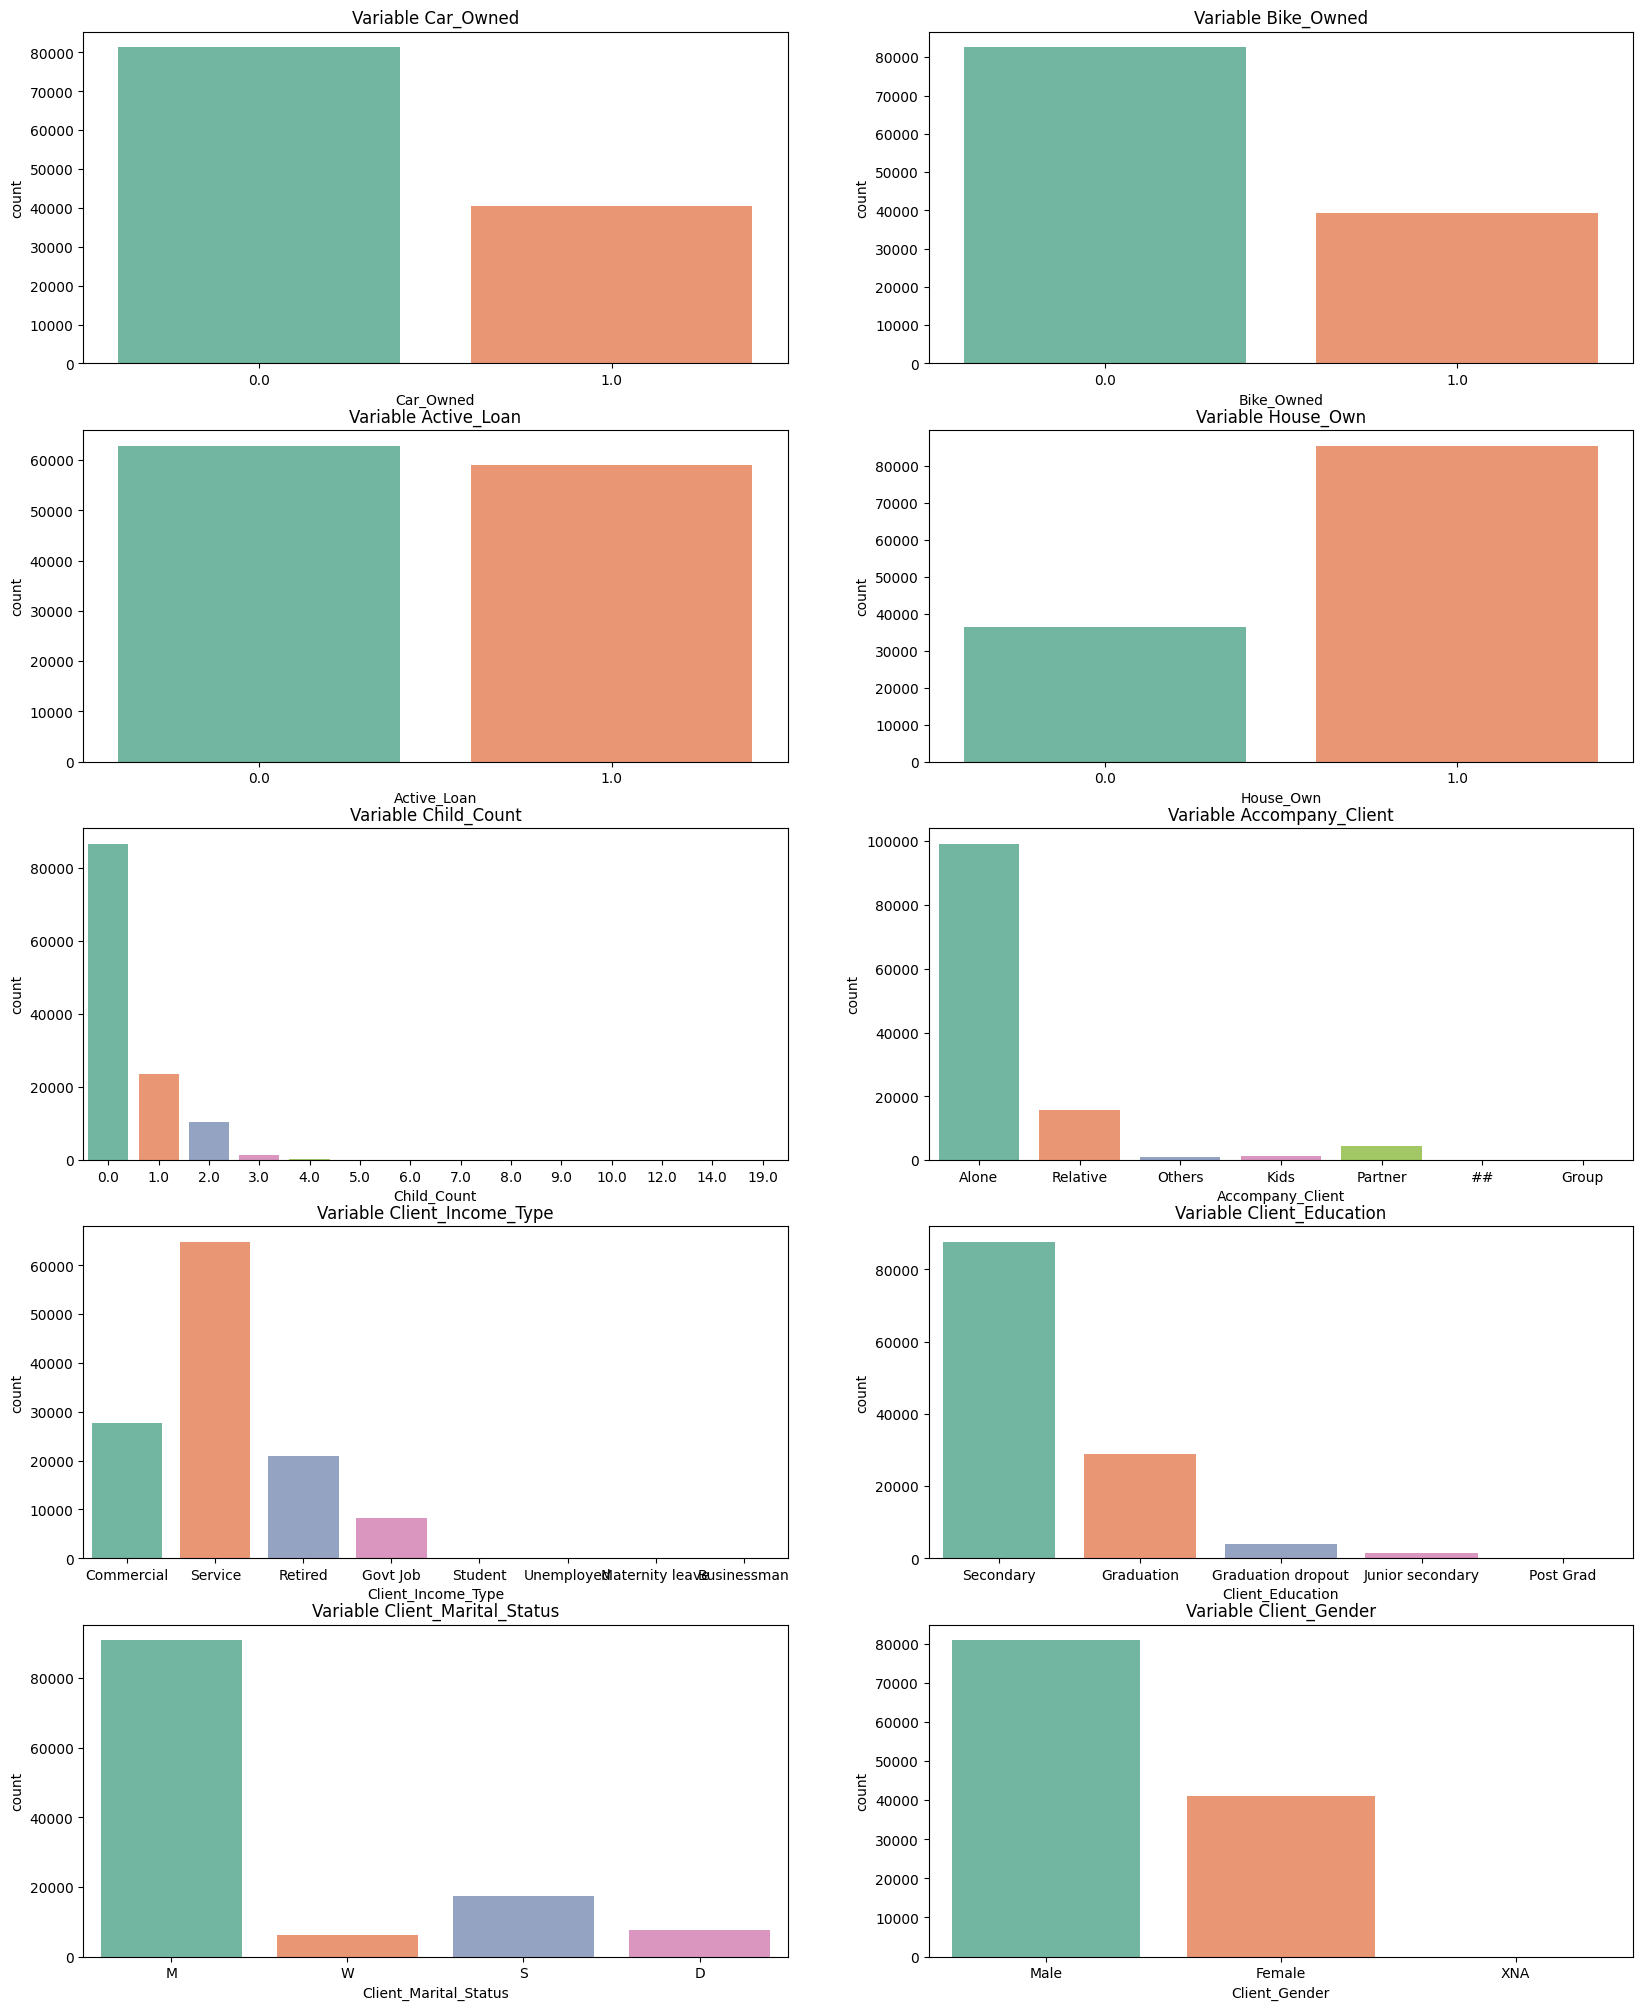

In [ ]:
plt.figure(figsize = (20, 25))

plt.subplot(5, 2, 1)
plt.gca().set_title('Variable Car_Owned')
sns.countplot(x = 'Car_Owned', palette = 'Set2', data = df)

plt.subplot(5, 2, 2)
plt.gca().set_title('Variable Bike_Owned')
sns.countplot(x = 'Bike_Owned', palette = 'Set2', data = df)

plt.subplot(5, 2, 3)
plt.gca().set_title('Variable Active_Loan')
sns.countplot(x = 'Active_Loan', palette = 'Set2', data = df)

plt.subplot(5, 2, 4)
plt.gca().set_title('Variable House_Own')
sns.countplot(x = 'House_Own', palette = 'Set2', data = df)
plt.subplot(5, 2, 5)
plt.gca().set_title('Variable Child_Count')
sns.countplot(x = 'Child_Count', palette = 'Set2', data = df)

plt.subplot(5, 2, 6)
plt.gca().set_title('Variable Accompany_Client')
sns.countplot(x = 'Accompany_Client', palette = 'Set2', data = df)

plt.subplot(5, 2, 7)
plt.gca().set_title('Variable Client_Income_Type')
sns.countplot(x = 'Client_Income_Type', palette = 'Set2', data = df)

plt.subplot(5, 2, 8)
plt.gca().set_title('Variable Client_Education')
sns.countplot(x = 'Client_Education', palette = 'Set2', data = df)

plt.subplot(5, 2, 9)
plt.gca().set_title('Variable Client_Marital_Status')
sns.countplot(x = 'Client_Marital_Status', palette = 'Set2', data = df)

plt.subplot(5, 2, 10)
plt.gca().set_title('Variable Client_Gender')
sns.countplot(x = 'Client_Gender', palette = 'Set2', data = df)

<Axes: title={'center': 'Boxplot Client_Income'}, xlabel='Client_Income'>

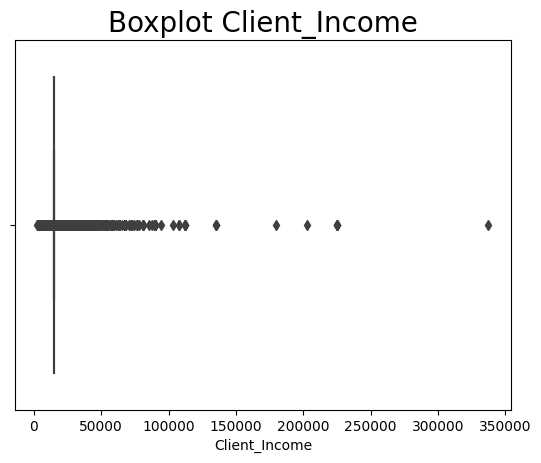

In [ ]:
plt.title("Boxplot Client_Income", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df["Client_Income"])

<Axes: title={'center': 'Boxplot Client_Income Without Outlier'}, xlabel='Client_Income'>

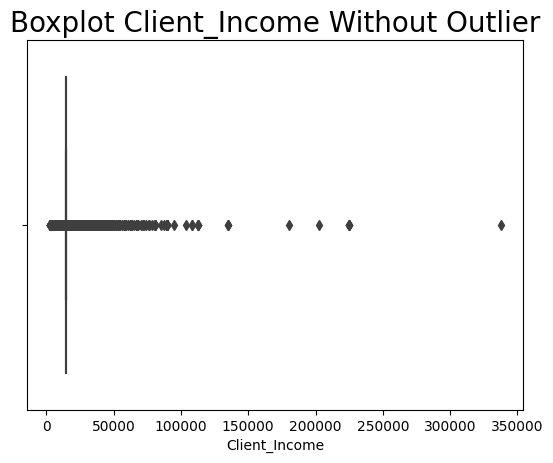

In [ ]:
plt.title("Boxplot Client_Income Without Outlier", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df["Client_Income"])

<Axes: title={'center': 'Boxplot Credit_Amount'}, xlabel='Credit_Amount'>

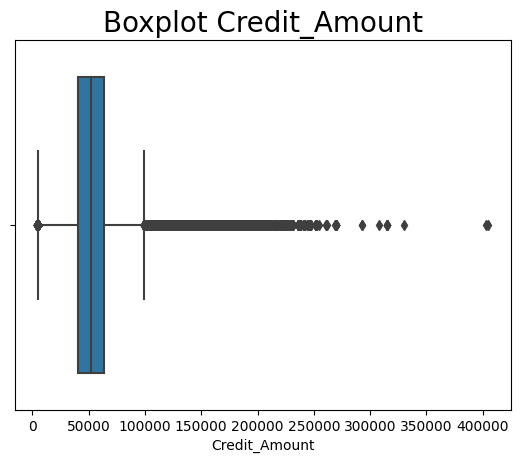

In [ ]:
plt.title("Boxplot Credit_Amount", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df["Credit_Amount"])

<Axes: title={'center': 'Boxplot Loan_Annuity'}, xlabel='Loan_Annuity'>

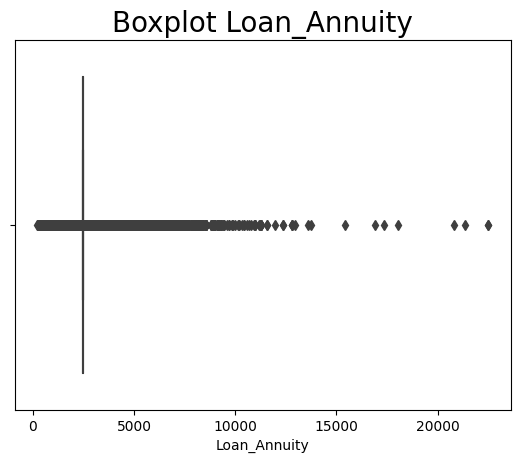

In [ ]:
plt.title("Boxplot Loan_Annuity", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df["Loan_Annuity"])

<Axes: title={'center': 'Boxplot Population_Region_Relative'}, xlabel='Population_Region_Relative'>

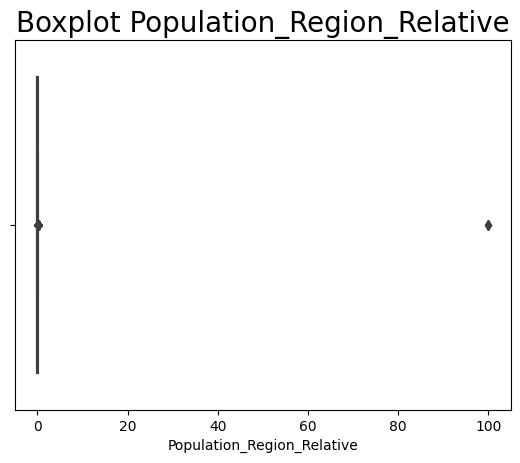

In [ ]:
plt.title("Boxplot Population_Region_Relative", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df["Population_Region_Relative"])

<Axes: title={'center': 'Boxplot Population_Region_Relative Without Outlier'}, xlabel='Population_Region_Relative'>

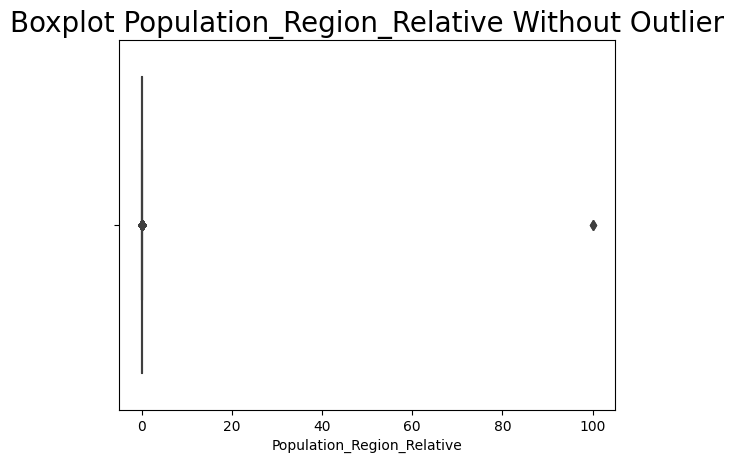

In [ ]:
plt.title("Boxplot Population_Region_Relative Without Outlier", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df["Population_Region_Relative"])

<Axes: title={'center': 'Boxplot Age_Days'}, xlabel='Age_Days'>

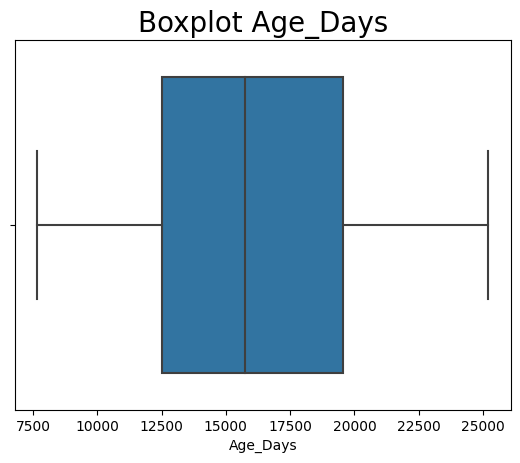

In [ ]:
plt.title("Boxplot Age_Days", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df["Age_Days"])

<Axes: title={'center': 'Boxplot Employed_Days'}, xlabel='Employed_Days'>

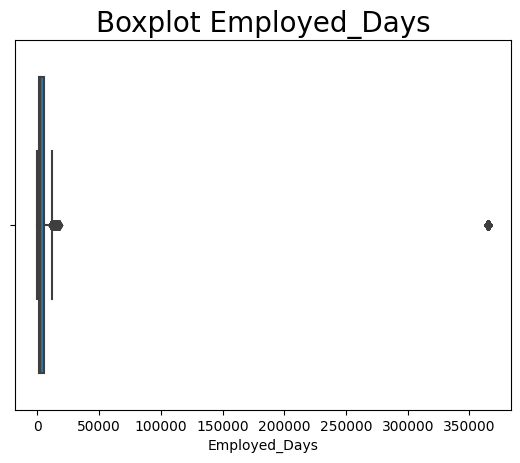

In [ ]:
plt.title("Boxplot Employed_Days", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df["Employed_Days"])

<Axes: title={'center': 'Boxplot Employed_Days Without Outlier'}, xlabel='Employed_Days'>

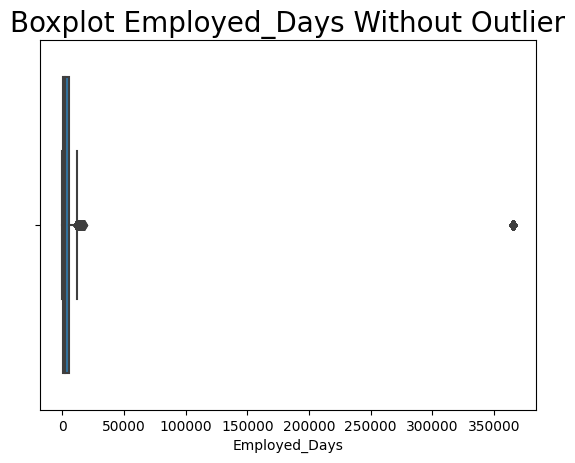

In [ ]:
plt.title("Boxplot Employed_Days Without Outlier", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df["Employed_Days"])

<Axes: title={'center': 'Boxplot Registration_Days'}, xlabel='Registration_Days'>

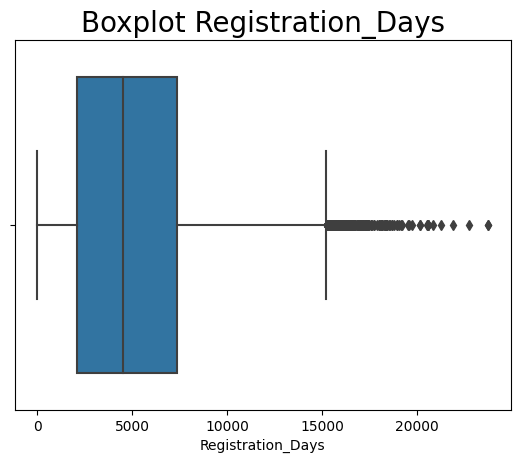

In [ ]:
plt.title("Boxplot Registration_Days", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df["Registration_Days"])

<Axes: title={'center': 'Boxplot ID_Days'}, xlabel='ID_Days'>

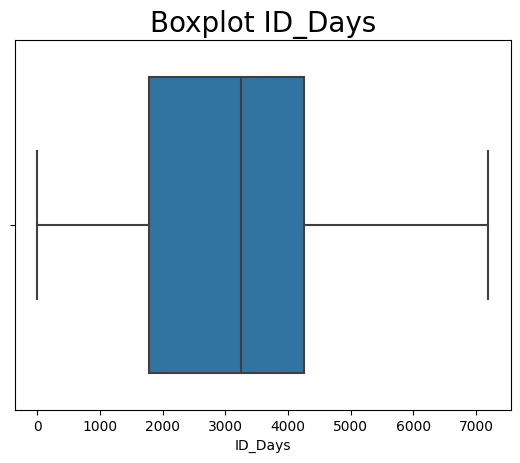

In [ ]:
plt.title("Boxplot ID_Days", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df["ID_Days"])

<Axes: title={'center': 'Boxplot Score_Source_2'}, xlabel='Score_Source_2'>

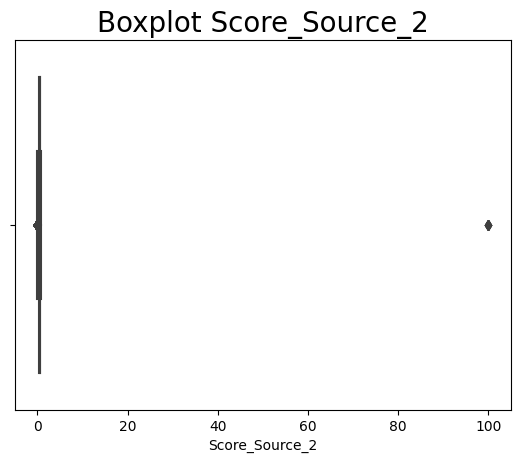

In [ ]:
plt.title("Boxplot Score_Source_2", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df["Score_Source_2"])

<Axes: title={'center': 'Boxplot Score_Source_2 Without Outliers'}, xlabel='Score_Source_2'>

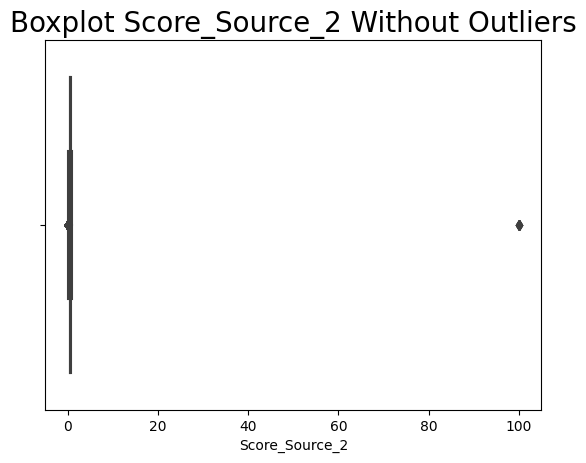

In [ ]:
plt.title("Boxplot Score_Source_2 Without Outliers", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df["Score_Source_2"])

<Axes: title={'center': 'Boxplot Phone_Change'}, xlabel='Phone_Change'>

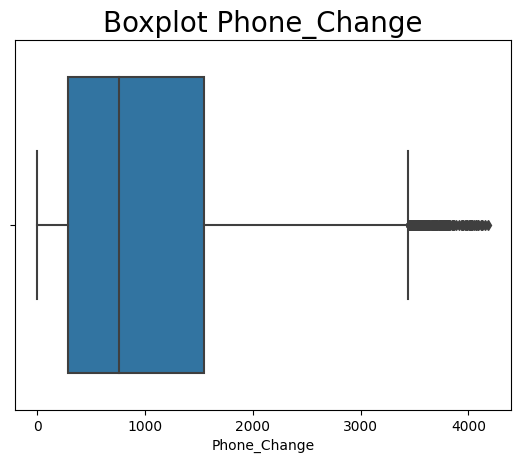

In [ ]:
plt.title("Boxplot Phone_Change", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df["Phone_Change"])

<Axes: title={'center': 'Boxplot Credit_Bureau'}, xlabel='Credit_Bureau'>

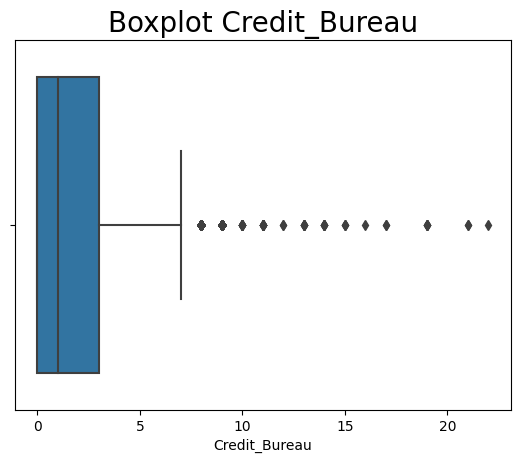

In [ ]:
plt.title("Boxplot Credit_Bureau", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df["Credit_Bureau"])

<Axes: title={'center': 'Boxplot Child_Count'}, xlabel='Child_Count'>

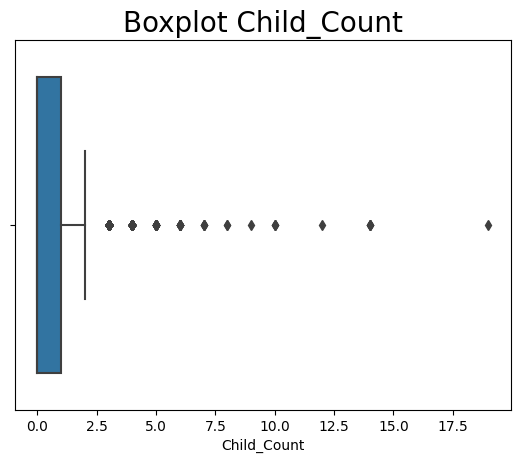

In [ ]:
plt.title("Boxplot Child_Count", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df["Child_Count"])

<Axes: title={'center': 'Boxplot Child_Count Without Outlier'}, xlabel='Child_Count'>

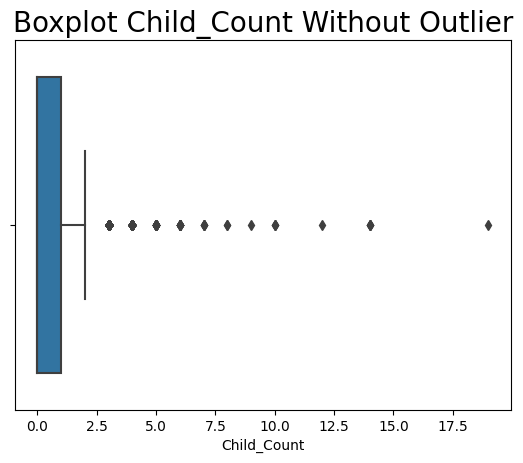

In [ ]:
plt.title("Boxplot Child_Count Without Outlier", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df["Child_Count"])

In [ ]:
df.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,14850.0,0.0,0.0,1.0,0.0,0.0,51792.3,2503.35,Alone,...,17.0,Yes,Yes,Self-employed,0.478787,NaN,0.0186,63.0,0.0,0
1,12138936,14850.0,1.0,0.0,1.0,1.0,0.0,51792.3,2503.35,Alone,...,10.0,Yes,Yes,Government,0.215068,NaN,NaN,755.0,0.0,0
2,12181264,14850.0,0.0,0.0,1.0,0.0,1.0,51792.3,2503.35,Alone,...,10.0,Yes,Yes,Self-employed,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,14850.0,0.0,0.0,1.0,1.0,0.0,51792.3,2503.35,Alone,...,15.0,Yes,Yes,XNA,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,14850.0,1.0,0.0,1.0,0.0,2.0,51792.3,2503.35,Alone,...,10.0,Yes,Yes,Business Entity Type 3,0.301182,0.355639,0.2021,674.0,1.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               121856 non-null  float64
 2   Car_Owned                   121856 non-null  float64
 3   Bike_Owned                  121856 non-null  float64
 4   Active_Loan                 121856 non-null  float64
 5   House_Own                   121856 non-null  float64
 6   Child_Count                 121856 non-null  float64
 7   Credit_Amount               121856 non-null  float64
 8   Loan_Annuity                121856 non-null  float64
 9   Accompany_Client            121856 non-null  object 
 10  Client_Income_Type          121856 non-null  object 
 11  Client_Education            121856 non-null  object 
 12  Client_Marital_Status       121856 non-null  object 
 13  Client_Gender 

In [ ]:
#numerical_variables

# ['Client_Income','Credit_Amount','Loan_Annuity','Population_Region_Relative','Age_Days',
 # 'Employed_Days','Registration_Days','Application_Process_Hour','Score_Source_2','Phone_Change','Credit_Bureau','Child_Count']


In [ ]:
from scipy import stats

#t-test

#segregate data based on default payment status

default_0_data=df[df['Default']==0]
default_1_data=df[df['Default']==1]

#select numerical variables

numerical_vars=['Client_Income','Credit_Amount','Loan_Annuity','Population_Region_Relative','Age_Days','Employed_Days','Registration_Days','Application_Process_Hour','Score_Source_2','Phone_Change','Credit_Bureau','Child_Count']

#perform t-test for difference of means

for var in numerical_vars:
  group_0_values= default_0_data[var]
  group_1_values= default_1_data[var]

#perform the t-test

  t_statistics,p_value=stats.ttest_ind(group_0_values, group_1_values)

  print(f"T-test for {var}:")
  print(f"T-statistics:{t_statistics:.4f}:")
  print(f"p-value : { p_value:.4f}:")
  print("")

T-test for Client_Income:
T-statistics:3.3230:
p-value : 0.0009:

T-test for Credit_Amount:
T-statistics:8.8784:
p-value : 0.0000:

T-test for Loan_Annuity:
T-statistics:1.5520:
p-value : 0.1207:

T-test for Population_Region_Relative:
T-statistics:0.8210:
p-value : 0.4116:

T-test for Age_Days:
T-statistics:25.5377:
p-value : 0.0000:

T-test for Employed_Days:
T-statistics:15.3141:
p-value : 0.0000:

T-test for Registration_Days:
T-statistics:13.2338:
p-value : 0.0000:

T-test for Application_Process_Hour:
T-statistics:8.1839:
p-value : 0.0000:

T-test for Score_Source_2:
T-statistics:13.0164:
p-value : 0.0000:

T-test for Phone_Change:
T-statistics:18.8235:
p-value : 0.0000:

T-test for Credit_Bureau:
T-statistics:-2.3425:
p-value : 0.0192:

T-test for Child_Count:
T-statistics:-6.7303:
p-value : 0.0000:



In [ ]:
df.columns

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'ID_Days', 'Mobile_Tag',
       'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_2', 'Score_Source_3',
       'Social_Circle_Default', 'Phone_Change', 'Credit_Bureau', 'Default'],
      dtype='object')

In [ ]:
import pandas as pd
# Segregate data based on default payment status
default_0_data = df[df['Default'] == 0]
default_1_data = df[df['Default'] == 1]
# Select categorical variables
categorical_vars = ['Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Accompany_Client',
 'Client_Income_Type', 'Client_Education', 'Client_Marital_Status', 'Client_Gender',
 'Loan_Contract_Type', 'Client_Housing_Type', 'Mobile_Tag', 'Homephone_Tag',
 'Client_Occupation', 'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
 'Type_Organization']
contingency_tables = {}
# Create contingency table for each categorical variable
for var in categorical_vars:
 # Create a contingency table using pd.crosstab
 contingency_table = pd.crosstab(df['Default'], df[var])

 # Store the contingency table for the variable
 contingency_tables[var] = contingency_table
# Print the contingency tables
for var, table in contingency_tables.items():
 print(f'Contingency table for {var}:\n{table}\n')

Contingency table for Car_Owned:
Car_Owned    0.0    1.0
Default                
0          74383  37628
1           6922   2923

Contingency table for Bike_Owned:
Bike_Owned    0.0    1.0
Default                 
0           75894  36117
1            6678   3167

Contingency table for Active_Loan:
Active_Loan    0.0    1.0
Default                  
0            57767  54244
1             5076   4769

Contingency table for House_Own:
House_Own    0.0    1.0
Default                
0          33447  78564
1           2950   6895

Contingency table for Accompany_Client:
Accompany_Client  ##  Alone  Group  Kids  Others  Partner  Relative
Default                                                            
0                 10  91023     97  1244     902     4158     14577
1                  2   8132      7    90      85      358      1171

Contingency table for Client_Income_Type:
Client_Income_Type  Businessman  Commercial  Govt Job  Maternity leave  \
Default                             

In [ ]:
from scipy.stats import chi2_contingency

# Perform chi-square test for each contingency table
results = {}

for var, table in contingency_tables.items():
    chi2, p_value, dof, _ = chi2_contingency(table)
    results[var] = {'Chi-square': chi2, 'p-value': p_value, 'Degrees of Freedom': dof}

# Print the results
for var, result in results.items():
    print(f'Chi-square test results for {var}:')
    print(f'Chi-square statistic: {result["Chi-square"]}')
    print(f'p-value: {result["p-value"]}')
    print(f'Degrees of Freedom: {result["Degrees of Freedom"]}')
    print("\n")


Chi-square test results for Car_Owned:
Chi-square statistic: 61.909287385348996
p-value: 3.596492698790053e-15
Degrees of Freedom: 1


Chi-square test results for Bike_Owned:
Chi-square statistic: 0.020308091977580954
p-value: 0.8866799747906008
Degrees of Freedom: 1


Chi-square test results for Active_Loan:
Chi-square statistic: 0.0002273535202817874
p-value: 0.9879697556952525
Degrees of Freedom: 1


Chi-square test results for House_Own:
Chi-square statistic: 0.04188440998957393
p-value: 0.8378402665046734
Degrees of Freedom: 1


Chi-square test results for Accompany_Client:
Chi-square statistic: 15.920321146240923
p-value: 0.014188085951273398
Degrees of Freedom: 6


Chi-square test results for Client_Income_Type:
Chi-square statistic: 415.5117833323844
p-value: 1.1227990237644369e-85
Degrees of Freedom: 7


Chi-square test results for Client_Education:
Chi-square statistic: 468.4066625676384
p-value: 4.5522808593584497e-100
Degrees of Freedom: 4


Chi-square test results for Clie

In [ ]:
from scipy import stats

# Perform chi-square test of association for each contingency table
for var, table in contingency_tables.items():
    chi2, p_value, _, _ = stats.chi2_contingency(table)

    # Print the test result
    print(f"Chi-square test of association for {var}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p_value}")
    print("\n")


Chi-square test of association for Car_Owned:
Chi-square statistic: 61.909287385348996
P-value: 3.596492698790053e-15


Chi-square test of association for Bike_Owned:
Chi-square statistic: 0.020308091977580954
P-value: 0.8866799747906008


Chi-square test of association for Active_Loan:
Chi-square statistic: 0.0002273535202817874
P-value: 0.9879697556952525


Chi-square test of association for House_Own:
Chi-square statistic: 0.04188440998957393
P-value: 0.8378402665046734


Chi-square test of association for Accompany_Client:
Chi-square statistic: 15.920321146240923
P-value: 0.014188085951273398


Chi-square test of association for Client_Income_Type:
Chi-square statistic: 415.5117833323844
P-value: 1.1227990237644369e-85


Chi-square test of association for Client_Education:
Chi-square statistic: 468.4066625676384
P-value: 4.5522808593584497e-100


Chi-square test of association for Client_Marital_Status:
Chi-square statistic: 87.9795446162526
P-value: 5.949361018012594e-19


Chi-squ

In [ ]:
## Client_Income
## Credit_Amount

In [ ]:
df.columns

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'ID_Days', 'Mobile_Tag',
       'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_2', 'Score_Source_3',
       'Social_Circle_Default', 'Phone_Change', 'Credit_Bureau', 'Default'],
      dtype='object')

In [ ]:
X=df[['Client_Income','Credit_Amount']]
X

,Client_Income,Credit_Amount
0,14850.0,51792.3
1,14850.0,51792.3
2,14850.0,51792.3
3,14850.0,51792.3
4,14850.0,51792.3
...,...,...
121851,14850.0,51792.3
121852,14850.0,51792.3
121853,14850.0,51792.3
121854,14850.0,51792.3


In [ ]:
y=df['Default']
y

0         0
1         0
2         0
3         0
4         0
         ..
121851    1
121852    0
121853    0
121854    0
121855    0
Name: Default, Length: 121856, dtype: int64

<Axes: title={'center': 'Boxplot Credit_Amount'}, xlabel='Credit_Amount'>

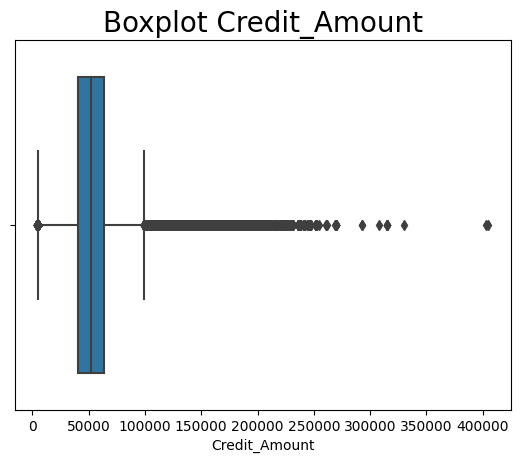

In [ ]:
plt.title("Boxplot Credit_Amount", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df["Credit_Amount"])

<Axes: title={'center': 'Boxplot Client_Income'}, xlabel='Client_Income'>

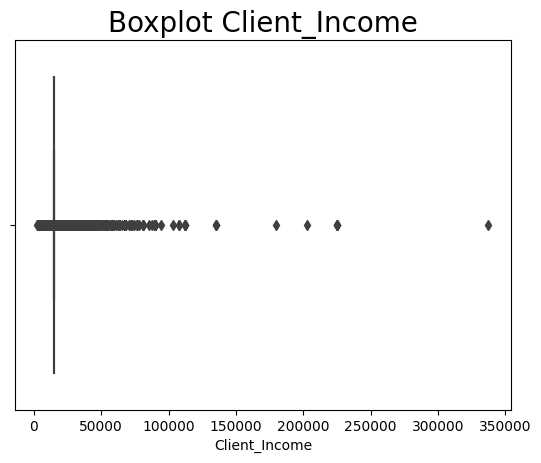

In [ ]:
plt.title("Boxplot Client_Income", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df["Client_Income"])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(81643, 2)
(81643,)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(40213, 2)
(40213,)


In [ ]:
import numpy as np

# Check for NaN values in X_train
print(np.isnan(X_train).sum())

Client_Income    0
Credit_Amount    0
dtype: int64


In [ ]:
import numpy as np

# Calculate mean and standard deviation manually
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

# Perform manual feature scaling
X_train_scaled = (X_train - mean) / std


In [ ]:
X_train_scaled

,Client_Income,Credit_Amount
47267,-0.0728,-0.163716
21843,-0.0728,-1.357040
111430,-0.0728,-0.371242
113364,-0.0728,-1.220554
86606,-0.0728,2.378542
...,...,...
110268,-0.0728,-0.371242
119879,-0.0728,-0.163716
103694,-0.0728,1.765065
860,-0.0728,-0.163716


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
print(scaler.fit_transform(X_train))

[[-0.07279998 -0.1637161 ]
 [-0.07279998 -1.35704001]
 [-0.07279998 -0.37124232]
 ...
 [-0.07279998  1.76506514]
 [-0.07279998 -0.1637161 ]
 [-0.07279998 -0.1637161 ]]


In [ ]:
print(scaler.transform(X_test))

[[-0.07279998  0.42641512]
 [-0.07279998 -1.19617763]
 [-0.07279998 -0.24901441]
 ...
 [-0.07279998 -0.1056819 ]
 [-2.11222911 -0.96794553]
 [-0.07279998 -0.1637161 ]]


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
model.score(X_train,y_train)

0.9188417868035227

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9199512595429339

In [ ]:
log_odds=model.coef_[0]
pd.DataFrame(log_odds,X_train.columns, columns=['coef'])


,coef
Client_Income,-0.000146
Credit_Amount,-0.000004


In [ ]:
odds= np.exp(model.coef_[0])
pd.DataFrame(odds,X_train.columns, columns=['coef'])

,coef
Client_Income,0.999854
Credit_Amount,0.999996


In [ ]:
X1=df[['Client_Education','Client_Occupation']]
X1

,Client_Education,Client_Occupation
0,Secondary,Sales
1,Graduation,NaN
2,Graduation dropout,Realty agents
3,Secondary,NaN
4,Secondary,Laborers
...,...,...
121851,Secondary,Laborers
121852,Graduation,Sales
121853,Secondary,High skill tech
121854,Graduation,Sales


In [ ]:
y1=df['Default']
y1

0         0
1         0
2         0
3         0
4         0
         ..
121851    1
121852    0
121853    0
121854    0
121855    0
Name: Default, Length: 121856, dtype: int64

In [ ]:
df['Client_Occupation'].value_counts()

Laborers              21024
Sales                 12136
Core                  10611
Managers               8099
Drivers                7150
High skill tech        4317
Accountants            3766
Medicine               3172
Security               2683
Cooking                2224
Cleaning               1722
Private service        1006
Low-skill Laborers      787
Secretaries             531
Waiters/barmen          511
Realty agents           280
HR                      206
IT                      196
Name: Client_Occupation, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

In [ ]:
df1=pd.DataFrame(ohe.fit_transform(df[['Client_Occupation']]).toarray(),columns=ohe.get_feature_names_out())
df2=pd.DataFrame(ohe.fit_transform(df[['Client_Education']]).toarray(),columns=ohe.get_feature_names_out())

In [ ]:
df1

,Client_Occupation_Accountants,Client_Occupation_Cleaning,Client_Occupation_Cooking,Client_Occupation_Core,Client_Occupation_Drivers,Client_Occupation_HR,Client_Occupation_High skill tech,Client_Occupation_IT,Client_Occupation_Laborers,Client_Occupation_Low-skill Laborers,Client_Occupation_Managers,Client_Occupation_Medicine,Client_Occupation_Private service,Client_Occupation_Realty agents,Client_Occupation_Sales,Client_Occupation_Secretaries,Client_Occupation_Security,Client_Occupation_Waiters/barmen,Client_Occupation_nan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
121853,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df2

,Client_Education_Graduation,Client_Education_Graduation dropout,Client_Education_Junior secondary,Client_Education_Post Grad,Client_Education_Secondary
0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
121851,0.0,0.0,0.0,0.0,1.0
121852,1.0,0.0,0.0,0.0,0.0
121853,0.0,0.0,0.0,0.0,1.0
121854,1.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc_data1 = pd.DataFrame(enc.fit_transform(df[["Client_Occupation"]]).toarray())
enc_data1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
121853,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
enc_data2 = pd.DataFrame(enc.fit_transform(df[["Client_Education"]]).toarray())
enc_data2

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
121851,0.0,0.0,0.0,0.0,1.0
121852,1.0,0.0,0.0,0.0,0.0
121853,0.0,0.0,0.0,0.0,1.0
121854,1.0,0.0,0.0,0.0,0.0


In [ ]:
d1=pd.concat([enc_data1,enc_data2], axis=1)
d1

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,0,1,2,3,4
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
121852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
121853,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
121854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
d=df[['Client_Income','Credit_Amount']]
d

,Client_Income,Credit_Amount
0,14850.0,51792.3
1,14850.0,51792.3
2,14850.0,51792.3
3,14850.0,51792.3
4,14850.0,51792.3
...,...,...
121851,14850.0,51792.3
121852,14850.0,51792.3
121853,14850.0,51792.3
121854,14850.0,51792.3


In [ ]:
X=horizontal_concat = pd.concat([d, d1], axis=1)
X

,Client_Income,Credit_Amount,0,1,2,3,4,5,6,7,...,14,15,16,17,18,0,1,2,3,4
0,14850.0,51792.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,14850.0,51792.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,14850.0,51792.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,14850.0,51792.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,14850.0,51792.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,14850.0,51792.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
121852,14850.0,51792.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
121853,14850.0,51792.3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
121854,14850.0,51792.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df1.columns = df1.columns.astype(str)

In [ ]:
y1=df['Default']
y1

0         0
1         0
2         0
3         0
4         0
         ..
121851    1
121852    0
121853    0
121854    0
121855    0
Name: Default, Length: 121856, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, y1, test_size=0.33, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(81643, 19)
(81643,)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(40213, 19)
(40213,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
print(scaler.fit_transform(X_train))

[[-0.17710689 -0.12208513 -0.1359231  ... -0.14950644 -0.06570973
  -0.71753255]
 [-0.17710689 -0.12208513 -0.1359231  ... -0.14950644 -0.06570973
   1.39366501]
 [-0.17710689 -0.12208513 -0.1359231  ... -0.14950644 -0.06570973
   1.39366501]
 ...
 [-0.17710689 -0.12208513 -0.1359231  ... -0.14950644 -0.06570973
   1.39366501]
 [-0.17710689 -0.12208513 -0.1359231  ... -0.14950644 -0.06570973
  -0.71753255]
 [-0.17710689 -0.12208513 -0.1359231  ... -0.14950644 -0.06570973
  -0.71753255]]


In [ ]:
print(scaler.transform(X_test))

[[-0.17710689 -0.12208513 -0.1359231  ... -0.14950644 -0.06570973
  -0.71753255]
 [-0.17710689 -0.12208513 -0.1359231  ... -0.14950644 -0.06570973
  -0.71753255]
 [-0.17710689 -0.12208513 -0.1359231  ... -0.14950644 -0.06570973
  -0.71753255]
 ...
 [-0.17710689 -0.12208513 -0.1359231  ... -0.14950644 -0.06570973
   1.39366501]
 [-0.17710689 -0.12208513 -0.1359231  ... -0.14950644 -0.06570973
   1.39366501]
 [-0.17710689 -0.12208513 -0.1359231  ... -0.14950644 -0.06570973
   1.39366501]]


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
model.score(X_train,y_train)

0.9188417868035227

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9199512595429339

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[36994     0]
 [ 3219     0]]


In [ ]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.92      1.00      0.96     36994\n           1       0.00      0.00      0.00      3219\n\n    accuracy                           0.92     40213\n   macro avg       0.46      0.50      0.48     40213\nweighted avg       0.85      0.92      0.88     40213\n'

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, zero_division=1)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)
print("Support:", support)

Precision: [0.91995126 1.        ]
Recall: [1. 0.]
F1-Score: [0.95830689 0.        ]
Support: [36994  3219]
